# **Sesión 3 - HSV y Bordes**

Este cuaderno aborda los siguientes temas:
- Extracción y visualización de canales de color.
- Conversión de RGB a otros espacios de color.
- Generación de bordes usando Sobel

---

## **1. Configuración Inicial**

En esta sección importaremos las librerías necesarias y definiremos algunas funciones auxiliares para visualizar imágenes de forma sencilla.


In [1]:
# Celdas de código
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para mostrar imágenes en formato RGB (usando matplotlib)
def mostrar_imagen(img_bgr, titulo="Imagen"):
    """
    Recibe una imagen en formato BGR (tal como la maneja OpenCV)
    y la muestra convertida a RGB, sin ejes.
    """
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

## **2. Carga de una imagen propia**

Ejecuta la siguiente celda y selecciona una imagen en tu equipo.  
Asegúrate de que el archivo sea un formato compatible (JPG, PNG, etc.).

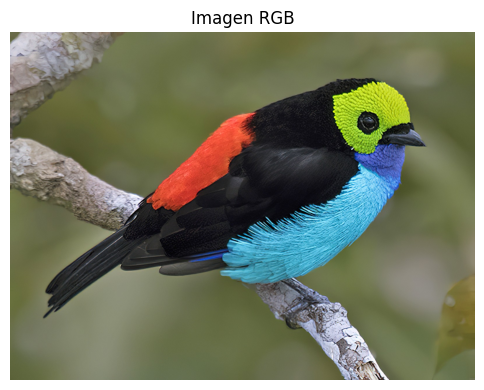

In [23]:
# Cargar la imagen con OpenCV (en formato BGR)
filename = "tangara.jpg"
img_user = cv2.imread(filename)
mostrar_imagen(img_user, "Imagen RGB")

## **3. Extracción y visualización de canales de color**

Vamos a separar una imagen en sus canales de color (B, G, R) y visualizarlos por separado.


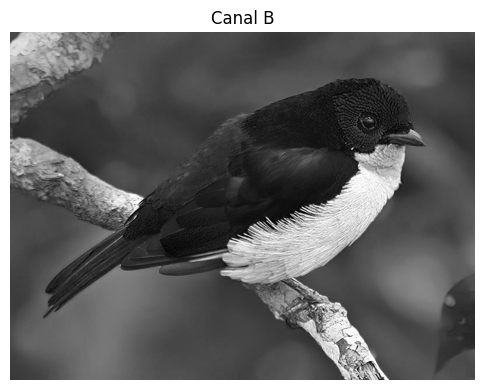

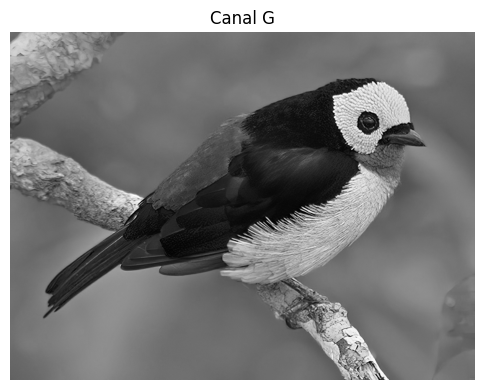

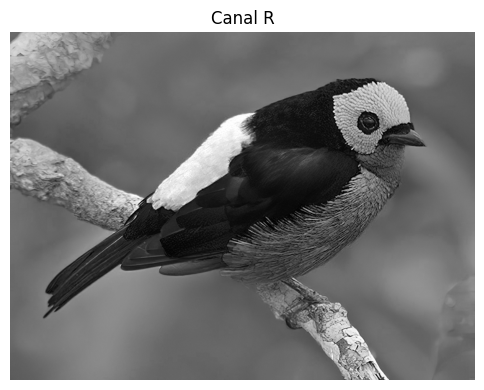

In [3]:
img = img_user.copy()

# Dividir canales
B, G, R = cv2.split(img)

# Mostrar cada canal (recordar que cada canal es en escala de grises)
mostrar_imagen(cv2.merge([B, B, B]), "Canal B")
mostrar_imagen(cv2.merge([G, G, G]), "Canal G")
mostrar_imagen(cv2.merge([R, R, R]), "Canal R")

## **5. Conversión de RGB a otros espacios de color**

Convertiremos la imagen de BGR (usada por OpenCV) a HSV y también a escala de grises para observar las diferencias.

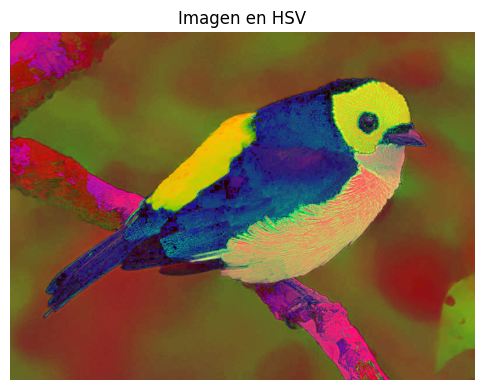

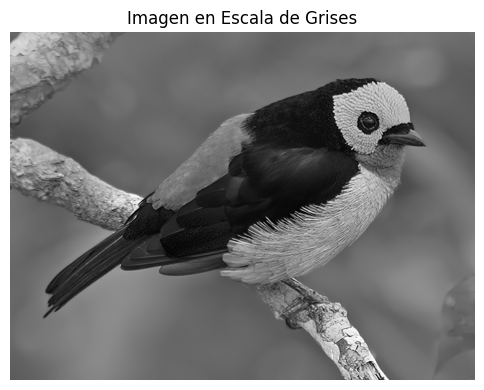

In [4]:
# Convertir de BGR a HSV
img = img_user
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mostrar_imagen(img_hsv, "Imagen en HSV")

# Convertir de BGR a Escala de Grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Para mostrarla con mostrar_imagen, debemos volver a ponerla en 3 canales
img_gray_3ch = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
mostrar_imagen(img_gray_3ch, "Imagen en Escala de Grises")


In [6]:
img_hsv[:,:,0].min()

np.uint8(0)

In [8]:
img_hsv[:,:,0].max()

np.uint8(179)

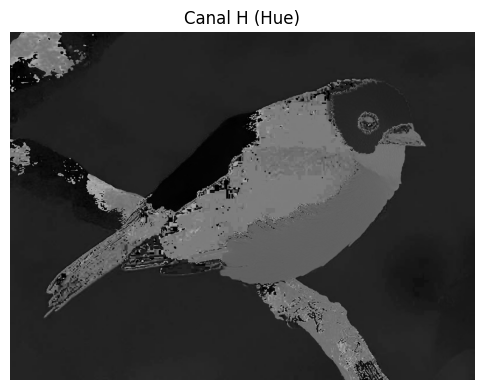

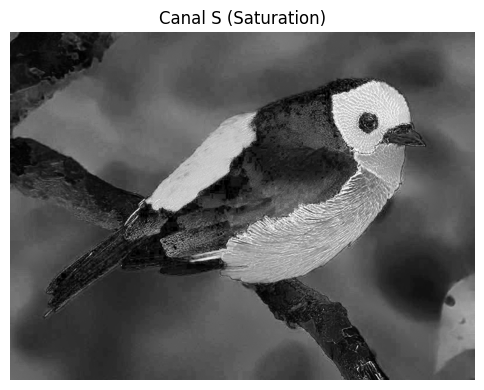

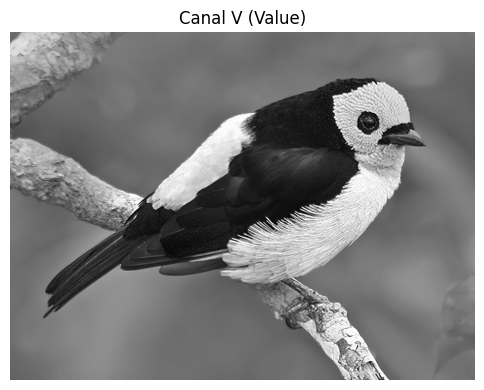

In [9]:
# Separar canales H, S y V
H, S, V = cv2.split(img_hsv)

# Mostrar cada canal por separado (en escala de grises, convertido a 3 canales BGR)
mostrar_imagen(cv2.merge([H, H, H]), "Canal H (Hue)")
mostrar_imagen(cv2.merge([S, S, S]), "Canal S (Saturation)")
mostrar_imagen(cv2.merge([V, V, V]), "Canal V (Value)")

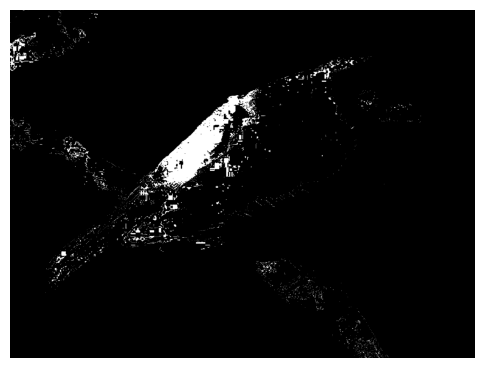

In [10]:
H_th = np.uint8((H<5)*255)
mostrar_imagen(cv2.merge([H_th, H_th, H_th]), "")

# Bordes

In [11]:
img_gray

array([[104, 102, 106, ..., 114, 114, 114],
       [108, 104, 111, ..., 113, 113, 114],
       [111, 105, 113, ..., 114, 113, 113],
       ...,
       [ 88,  91,  93, ..., 108, 106, 108],
       [ 89,  92,  92, ..., 108, 105, 107],
       [ 88,  91,  90, ..., 111, 108, 111]], dtype=uint8)

In [12]:
# Escala de grises para bordes
gray = img_gray.astype(np.float32) / 255.0

# Sobel horizontal y vertical
sobel_ksize = 3
sobelx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=sobel_ksize)
sobely = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=sobel_ksize)

# Normalizar bordes al rango [0, 1] usando valores absolutos
sobelx_norm = cv2.normalize(np.abs(sobelx), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
sobely_norm = cv2.normalize(np.abs(sobely), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

(np.float64(-0.5), np.float64(1599.5), np.float64(1198.5), np.float64(-0.5))

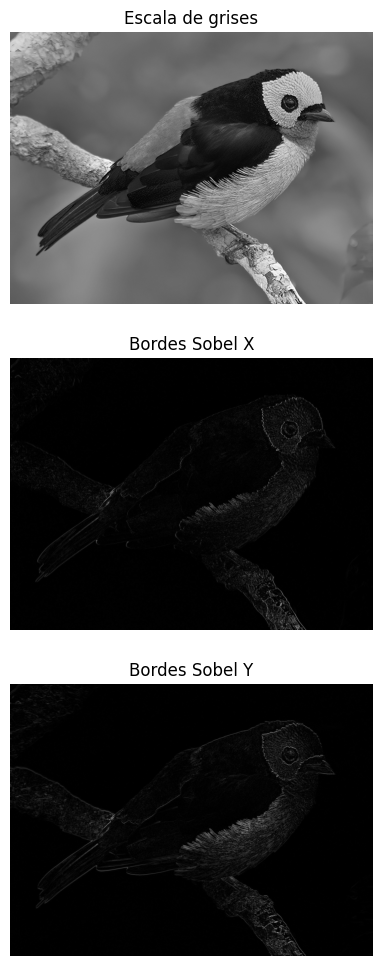

In [20]:
# Mostrar canales
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(3, 1, figsize=(6, 12))
# Sobel channels
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Escala de grises')
axes[0].axis('off')
axes[1].imshow(sobelx_norm, cmap='gray')
axes[1].set_title('Bordes Sobel X')
axes[1].axis('off')
axes[2].imshow(sobely_norm, cmap='gray')
axes[2].set_title('Bordes Sobel Y')
axes[2].axis('off')

In [21]:
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
sobel_magnitude_norm = cv2.normalize(sobel_magnitude, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

(np.float64(-0.5), np.float64(1599.5), np.float64(1198.5), np.float64(-0.5))

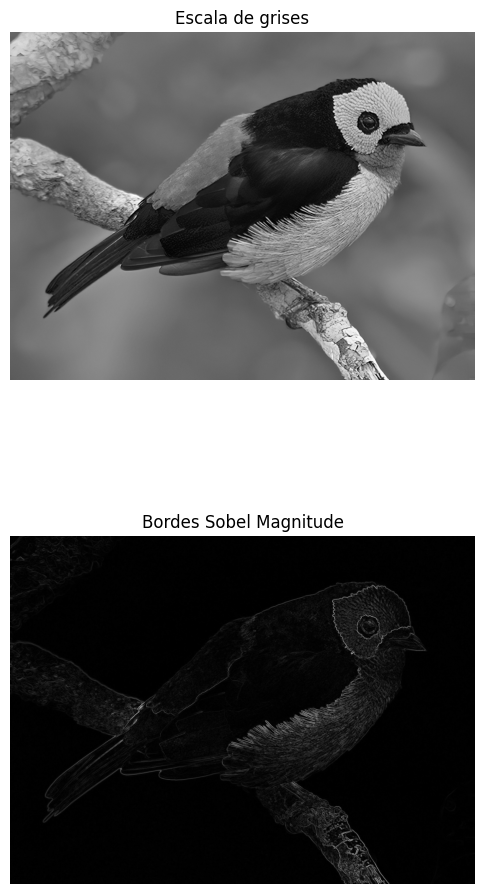

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
# Sobel channels
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Escala de grises')
axes[0].axis('off')
axes[1].imshow(sobel_magnitude_norm, cmap='gray')
axes[1].set_title('Bordes Sobel Magnitude')
axes[1].axis('off')
